In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import seaborn as sns
import cufflinks as cf
import plotly.express  as px
%matplotlib inline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

### BASIC

In [2]:
arr_1= np.random.randn(50,4)
df_1 = pd.DataFrame(arr_1,columns=['A','B','C','D'])
df_1.head()

,A,B,C,D
0,-1.399475,-0.407079,-0.701132,-0.625471
1,0.956533,0.056711,-0.280191,1.091214
2,-0.804624,0.307019,-1.709030,-0.249128
3,-1.519130,-1.029322,-0.397481,-0.754649
4,0.324777,-0.582549,-0.705276,-1.200928


<AxesSubplot:>

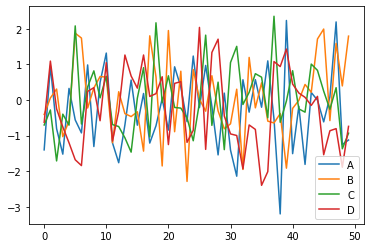

In [3]:
# Matplot 
df_1.plot()

In [4]:
# More interactive
df_1.iplot()

### Line Plot

In [5]:
import plotly.graph_objects as go

In [6]:
df_stocks = px.data.stocks()
df_stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [7]:
px.line(df_stocks,x='date',y='GOOG',labels = {'x':'Date','y':'Price'})

In [8]:
px.line(df_stocks,x='date',y=['GOOG','FB'],labels = {'x':'Date','y':'Price'},title= 'GOOG Vs FB')

In [9]:
# Line plot with adding traces
#create the figure object
fig = go.Figure()
# add required column
fig.add_trace(go.Scatter(x=df_stocks.date,y = df_stocks.AAPL,mode ='lines',name = 'Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date,y = df_stocks.AMZN,mode ='lines+markers',name = 'Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date,y = df_stocks.GOOG,mode ='lines+markers',name = 'Google',
                         line=dict(color='firebrick',width =2,dash = 'dashdot')))
# add the title & axis label
fig.update_layout(title = 'Stock Price Date 2018 - 2020',xaxis_title='Data',yaxis_title ='Price')

In [10]:
# scatter plot custom
#create the figure object
fig = go.Figure()
# add required column
fig.add_trace(go.Scatter(x=df_stocks.date,y = df_stocks.AAPL,mode ='lines',name = 'Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date,y = df_stocks.AMZN,mode ='lines+markers',name = 'Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date,y = df_stocks.GOOG,mode ='lines+markers',name = 'Google',
                         line=dict(color='firebrick',width =2,dash = 'dashdot')))
# l = left,r = right,t = top
fig.update_layout(
xaxis =dict(showline = True,showgrid = False,showticklabels=True,
linecolor= 'rgb(204,204,204)',
linewidth = 2,ticks ='outside',tickfont =dict(family ='Arial',size =12 ,color = 'rgb(82,82,82)')
),
yaxis =dict(showgrid = False,zeroline=False, showline=False,
            showticklabels=False),
autosize = False,
margin = dict(autoexpand = False,l=100,r = 20,t =110),
showlegend = False,
plot_bgcolor = 'white'
)


## Bar

In [11]:
# if we want specify data set by country  from plotly dataset use query
df_us = px.data.gapminder().query("country == 'United States'")
px.bar(df_us,x ='year', y = 'pop')

In [12]:
# stacked bar plot
df_tips = px.data.tips()
print(df_tips.head(5))
# Here color should be cat - so that we can get two differnt color
px.bar(df_tips,x ='day', y ='tip', color ='sex',
      title='Tips by Sex on Each day',
      labels={'tip':'Tip Amount','day':'Day of the week'})

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [13]:
# stacked bar plot
df_tips = px.data.tips()
print(df_tips.head(5))
# Here color should be cat - so that we can get two differnt color
px.bar(df_tips,x ='day', y ='tip', color ='sex',
      title='Tips by Sex on Each day',
      labels={'tip':'Tip Amount','day':'Day of the week'},barmode='group')

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [14]:
# Group plot
px.bar(df_tips,x='sex',y='total_bill',color = 'smoker',barmode='group')


In [15]:
# Bar chart with more custom
df_europe = px.data.gapminder().query("continent =='Europe' and year == 2007 and pop >2.e6")
px.bar(df_europe,x='country',y='pop',text='pop',color ='country')                                      

In [16]:
df_asia = px.data.gapminder().query("continent =='Asia' and year == 2007 and pop >2.e6")
px.bar(df_asia,x='country',y='pop',text='pop',color ='country')    

In [17]:
# More customize
fig = px.bar(df_europe,x='country',y='pop',text='pop',color ='country') 
# Two digit, font outside
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
# Font uniform with size of 8
fig.update_layout(uniformtext_minsize=8)
# X axis lable 45 degree slide
fig.update_layout(xaxis_tickangle = -45)


### Scatter plot

In [23]:
# Similar to sns hue
df_iris = px.data.iris()
px.scatter(df_iris,x ='sepal_width',y='sepal_length',color='species',size ='petal_length',hover_data=['petal_width'])

In [26]:
df_iris = px.data.iris()
px.scatter(df_iris,x ='petal_width',y='petal_length',color='species',size ='sepal_length',hover_data=['sepal_width'])

In [ ]:
# Customize
fig = go.Figure()
fig.add_trace(go.Scatter(
x =df_iris,y='sepal_length',color='species',size ='petal_length',hover_data=['petal_width'])
